In [89]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import Imputer 
from pylab import savefig
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [90]:
losses=pd.read_csv('automobile-losses.csv')
risk=pd.read_csv('automobile-risk.csv')
spec=pd.read_csv('automobile-spec.csv')

In [91]:
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [92]:
risk.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [93]:
spec.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# USE CASE

## PART 1

### Join 3 tables using ID as key

In [94]:
result1 = pd.merge(losses,
                 risk[['ID', 'symboling']],
                 on='ID', 
                 how='left')
result2= pd.merge(result1,
                 spec,
                 on='ID',
                 how='left')

### quick look (dimension, data type, head/tail, summary statistics etc)

In [95]:
result2.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [96]:
result2.tail()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,201,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,202,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,203,95.0,-1,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,204,95.0,-1,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,205,95.0,-1,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


In [202]:
result2.shape

(205, 27)

In [98]:
result2.describe().round(2)

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,164.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,201.00,201.00,205.00,203.00,203.00,205.00,205.00,201.00
mean,103.00,122.00,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.26,5125.37,25.22,30.75,13207.13
std,59.32,35.44,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.32,3.97,39.71,479.33,6.54,6.89,7947.07
min,1.00,65.00,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,94.00,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7775.00
50%,103.00,115.00,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,150.00,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.59,3.41,9.40,116.00,5500.00,30.00,34.00,16500.00
max,205.00,256.00,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


In [99]:
result2.dtypes

ID                     int64
normalized-losses    float64
symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### identify missing value

In [100]:
count_missing=result2.isnull().sum().sort_values(ascending=False)
count_missing.head()

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
dtype: int64

In [101]:
result3=result2.fillna(result2.mean())
count_missing1=result3.isnull().sum().sort_values(ascending=False)
count_missing1.head(10)

num-of-doors         1
price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
body-style           0
drive-wheel          0
dtype: int64

In [102]:
result3=result3.dropna()
result3.isnull().sum().sort_values(ascending=False)

price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
height               0
highway-mpg          0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
ID                   0
dtype: int64

### Visualization 

In [103]:
result3.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [104]:
kategorik=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheel',
'engine-loc','engine-type','cylinder','fuel-system']
numerical=result3.drop(kategorik,axis=1)
categorical=result3[kategorik]
numerical.head()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [105]:
categorical.describe()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,engine-type,cylinder,fuel-system
count,204,204,204,204,204,204,204,204,204,204
unique,22,2,2,3,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,184,168,114,95,119,201,147,158,93


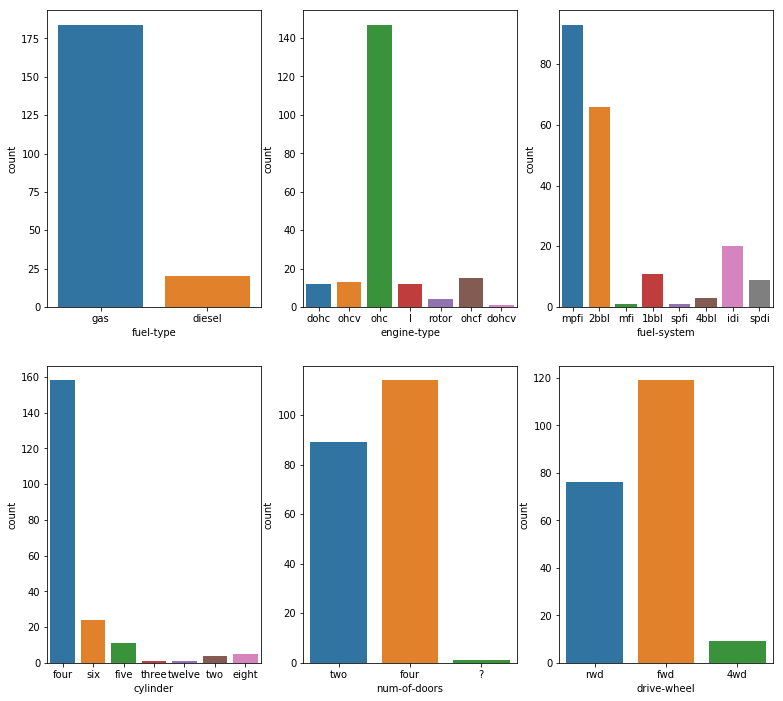

In [106]:
f=plt.figure(figsize=(13,12))
f.add_subplot(2,3,1)
sns.countplot(categorical['fuel-type'])
f.add_subplot(2,3,2)
sns.countplot(categorical['engine-type'])
f.add_subplot(2,3,3)
sns.countplot(categorical['fuel-system'])
f.add_subplot(2,3,4)
sns.countplot(categorical['cylinder'])
f.add_subplot(2,3,5)
sns.countplot(categorical['num-of-doors'])
f.add_subplot(2,3,6)
sns.countplot(categorical['drive-wheel'])




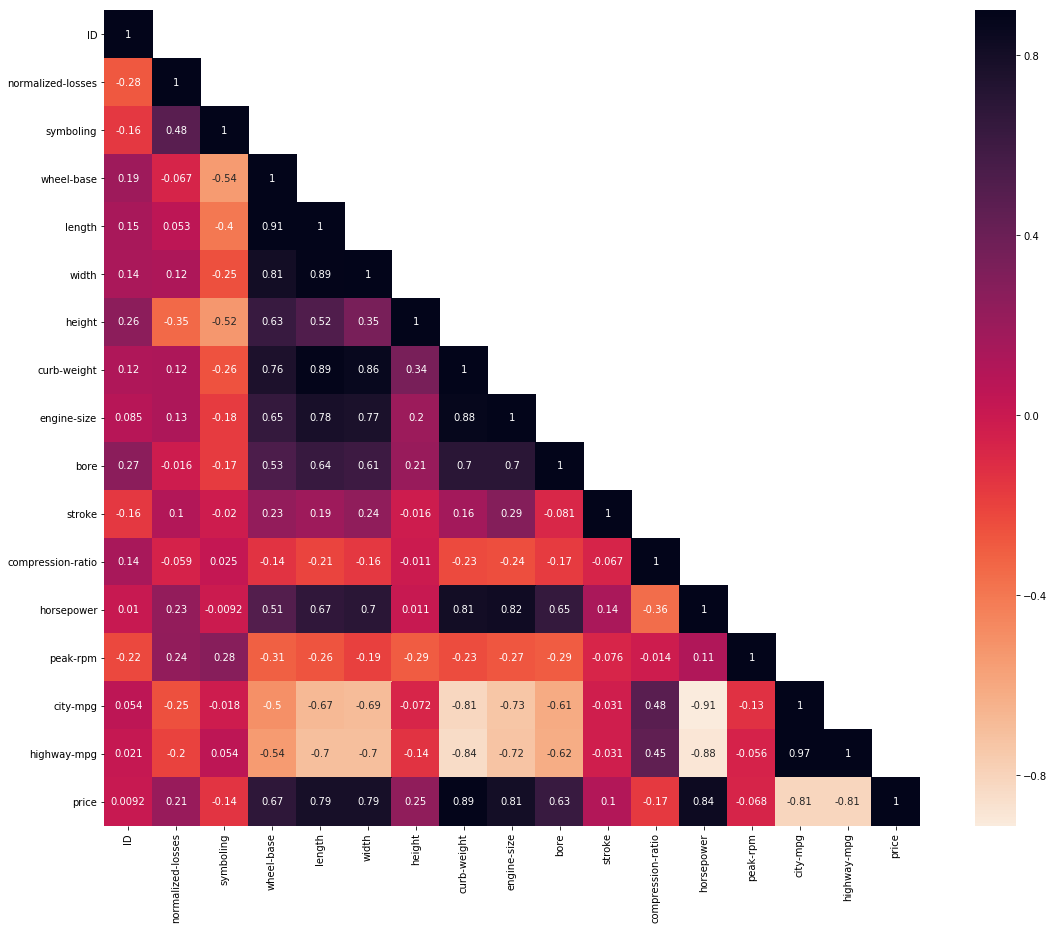

In [107]:
#create correlation
corr = result3.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,15)
cmap=sns.cm.rocket_r
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True, cmap=cmap)

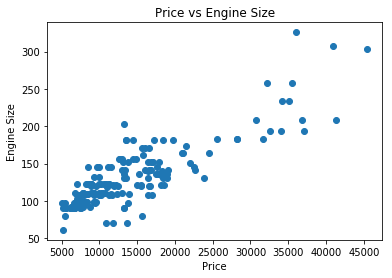

In [108]:
plt.scatter(result3['price'],result3['engine-size'])
plt.title('Price vs Engine Size')
plt.xlabel('Price')
plt.ylabel('Engine Size')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

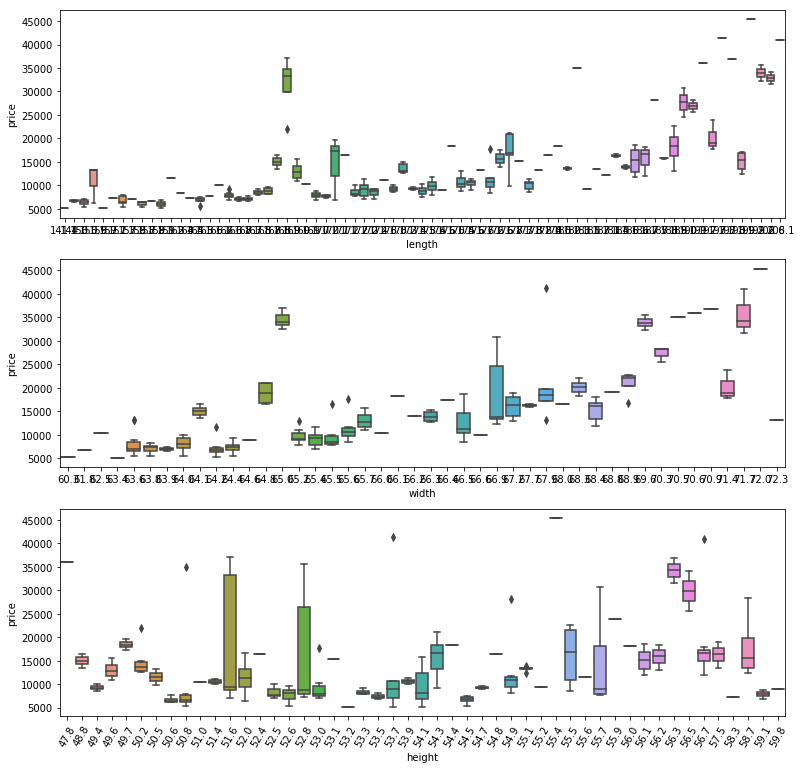

In [109]:
f=plt.figure(figsize=(13,13))
f.add_subplot(3,1,1)
g = sns.boxplot(y=result3["price"], x=result3['length'])
f.add_subplot(3,1,2)
g = sns.boxplot(y=result3["price"], x=result3['width'])
f.add_subplot(3,1,3)
g = sns.boxplot(y=result3["price"], x=result3['height'])
plt.xticks(rotation=60)

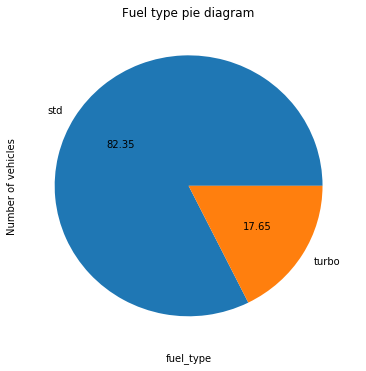

In [110]:
result3['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Fuel type pie diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('fuel_type');

## PART 2

### Car brand with highest price

In [111]:
car_brand=result3.sort_values(by=['price'],ascending=False).head(1)[['make','price']]
car_brand

,make,price
74,mercedes-benz,45400.0


### Maximum horsepower for car with 6 cylinder engine

In [112]:
result3[result3.cylinder == 'six'].sort_values(by=['horsepower'],ascending=False).head(1)[['horsepower','cylinder']]

,horsepower,cylinder
126,207.0,six


### Average peak rpm for turbo style aspiration car

In [113]:
result3[result3.aspiration == 'turbo'][['peak-rpm']].mean()

peak-rpm    4923.611111
dtype: float64

###  Average price based on body-style

In [114]:
pd.DataFrame(result3.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
convertible,21890.50
hardtop,22208.50
hatchback,10050.29
sedan,14495.51
wagon,12371.96


### Average price based on body-style only for Honda car (make=Honda)

In [115]:
result3_honda=(result3[result3['make']=='honda'])
pd.DataFrame(result3_honda.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
hatchback,7054.43
sedan,9945.00
wagon,7295.00


## CLUSTERING 

Clustering antara data ukuran mesin dan harga kendaraan bekas.

In [116]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

automobile=result3

In [117]:
automobile.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [148]:
automobile1=automobile[['engine-size','price']]
automobile1.head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [149]:
automobile1.describe()

,engine-size,price
count,204.00000,204.000000
mean,127.04902,13229.919203
std,41.69556,7881.340541
min,61.00000,5118.000000
25%,97.00000,7784.750000
50%,120.00000,10646.500000
75%,142.00000,16500.000000
max,326.00000,45400.000000


### K-MEANS CLUSTERING

In [119]:
X = np.asarray(automobile1)

#### Menentukan jumlah K

Dalam menentukan jumlah cluster yang terbentuk maka akan menggunakan 2 metode, yakni : <br>
* Elbow
* Silhouette

##### Menggunakan Elbow

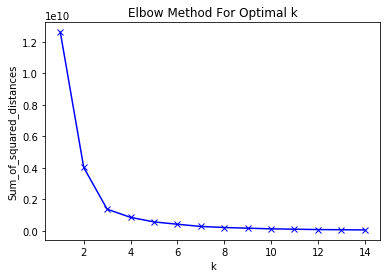

In [120]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

#### Metode Silhouette

In [121]:
range_n_clusters = [2, 3, 4, 5]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.7205648513842734
0.6546027549768478
0.6002162767829005
0.6092562012443238


1. Dengan metode Elbow diketahui bahwa cluster yang terbentuk adalah 2
2. Dengan menggunakan metode Silhouette diketahui bahwa nilai terbesar berada pada cluster 2 dengan nilai silhouette sebesar 0,72

In [122]:
# Aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [123]:
# Menampilkan nilai Centroid 
print(kmeans.cluster_centers_)

[[  203.84       30585.12      ]
 [  116.32402235 10806.00847717]]


In [124]:
# Mengetahui Pembagian Cluster yang terbentuk
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]


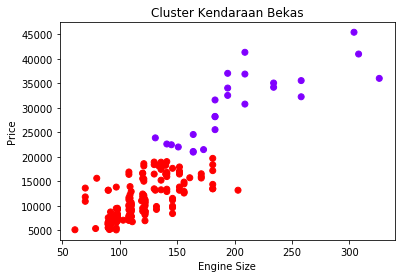

In [178]:
# Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Cluster Kendaraan Bekas")
plt.show()

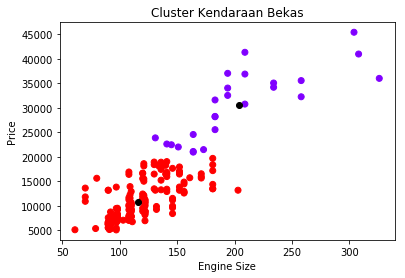

In [179]:
# Hasil X 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Cluster Kendaraan Bekas")
plt.show()

In [180]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

In [181]:
automobile1['cluster kmeans']=kmeans.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [205]:
automobile1.head()

,engine-size,price,cluster kmeans,cluster hierarchical,DBSCAN Clustering
0,130,13495.0,1,0,0
1,130,16500.0,1,2,1
2,152,16500.0,1,2,1
3,109,13950.0,1,0,0
4,136,17450.0,1,2,1


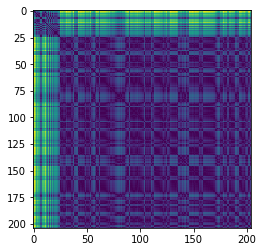

In [183]:
# Similarity Matrix
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

### HIERARCHICAL CLUSTERING

In [184]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#### Menentukan Jumlah Cluster dengan Dendogram

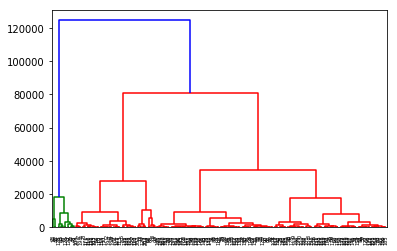

In [185]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

Dari hasil dendogram diketahui jumlah cluster yang terbentuk sebanyak **3 cluster**

In [186]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_
labels

array([0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

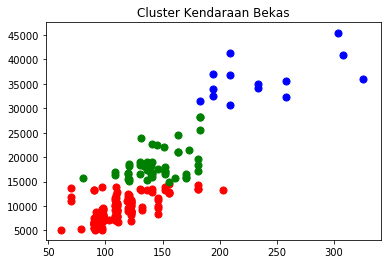

In [187]:
# Membuat plot data setelah dilakukan hierarchical clustering
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(X[labels==2, 0], X[labels==2, 1], s=50, marker='o', color='green')
plt.title("Cluster Kendaraan Bekas")
plt.show()

In [188]:
automobile1['cluster hierarchical']=model.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [189]:
automobile1.head()

,engine-size,price,cluster kmeans,cluster hierarchical
0,130,13495.0,1,0
1,130,16500.0,1,2
2,152,16500.0,1,2
3,109,13950.0,1,0
4,136,17450.0,1,2


### DBSCAN CLUSTERING

In [190]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

Text(0,0.5,'Price')

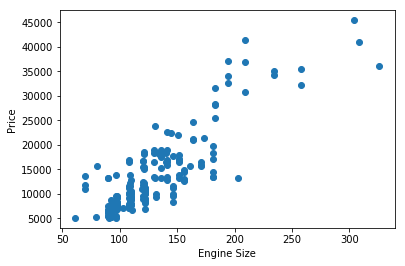

In [191]:
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Engine Size")
plt.ylabel("Price")

In [192]:
dbscan = DBSCAN(eps=900,min_samples=15)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=900, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=15, n_jobs=1, p=None)

In [193]:
print(dbscan.labels_)

[ 0  1  1  0  1  1  1 -1 -1  0  1  1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1  1 -1 -1 -1 -1 -1 -1
 -1 -1  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  1 -1  1  0  0  0  0  1  1  1  1  1  1  1  0  0  0
  0  0  0  0 -1 -1 -1 -1  0  0  0  0  0  1  1  1 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  0  0  0  0  0  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  1  1 -1  1 -1 -1 -1 -1]


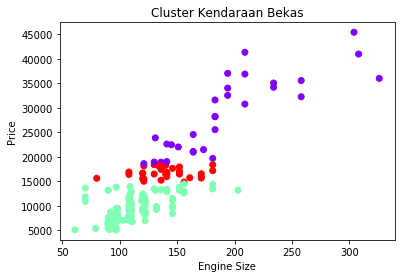

In [199]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.title("Cluster Kendaraan Bekas")
plt.show()

In [195]:
automobile1['DBSCAN Clustering']=dbscan.labels_

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [196]:
automobile1.head()

,engine-size,price,cluster kmeans,cluster hierarchical,DBSCAN Clustering
0,130,13495.0,1,0,0
1,130,16500.0,1,2,1
2,152,16500.0,1,2,1
3,109,13950.0,1,0,0
4,136,17450.0,1,2,1


Setelah dilakukan clustering dengan menggunakan tiga metode, yakni :
1. K-Means Clustering
2. Hierarchical Clustering
3. DBScan Clustering
maka diketahui hasil cluster dari masing-masing metode adalah sebagai berikut :

In [213]:
automobile1

,engine-size,price,cluster kmeans,cluster hierarchical,DBSCAN Clustering
0,130,13495.000000,1,0,0
1,130,16500.000000,1,2,1
2,152,16500.000000,1,2,1
3,109,13950.000000,1,0,0
4,136,17450.000000,1,2,1
5,136,15250.000000,1,2,1
6,136,17710.000000,1,2,1
7,136,18920.000000,1,2,-1
8,131,23875.000000,0,2,-1
9,131,13207.129353,1,0,0


1. **jumlah cluster yang terbentuk dari masing - masing metode :**
    * KMEANS Clustering = 2 cluster
    * Hierarchical Clustering = 3 cluster
    * DBScan Clustering = 2 Cluster
2. **Cluster yang lebih baik :** <br>
   **Hierarchical clustering**, dikarenakan dari ketiga kelompok yang telah disusun memiliki karakteristik dalam cluster yang hampir sama jika dilihat berdasarkan jarak antara masing-masing cluster 
3. **Ciri-ciri dari masing-masing cluster :** <br>
    Cluster 0 : Ukuran mesin antara 61 hingga 141 dengan range harga 5000 hingga 13950 <br>
    Cluster 1 : Ukuran mesin dan harga diatas 180 dengan harga lebih dari 20000 <br>
    Cluster 2 : Ukuran mesin dan berada pada 130 hingga 171 dengan harga diatas 14000 <br>
